### TEMPLATE MATCHING

En este trabajo práctico se busca la identificación de objetos a través de diferentes algoritmos, entre ellos __template matchin__. 

In [26]:
#Import libraries
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import scipy.stats as st
from PIL import Image

#%matplotlib


### Ejercicio 1

### Detección del logo en cada imagen

### Coca logo 1

In [27]:
#Reading image
img_pattern = cv.imread('./imgs/tp3/template/pattern.png', 0)
img_pattern_down = cv.pyrDown(img_pattern)
print(img_pattern_down.shape) 

(88, 200)


(500, 207, 3)


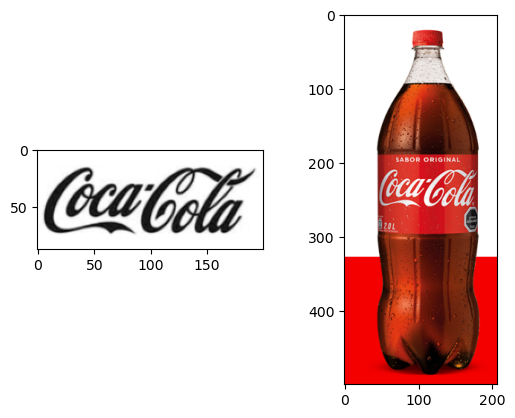

In [33]:

#Images to process
img_1 = cv.imread('./imgs/tp3/images/coca_logo_1.png')
#img1 = cv.pyrUp(img_1)
print(img_1.shape)
img_coca_logo_1 = cv.cvtColor(img_1, cv.COLOR_BGR2RGB)
img_coca_logo_1_gray = cv.cvtColor(img_1, cv.COLOR_BGR2GRAY)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(img_pattern_down, cmap= 'gray')
plt.subplot(1,2,2)
plt.imshow(img_coca_logo_1)

[INFO] performing template matching...
-7226973.0 15607288.0 (6, 21) (0, 116)
(0, 116)


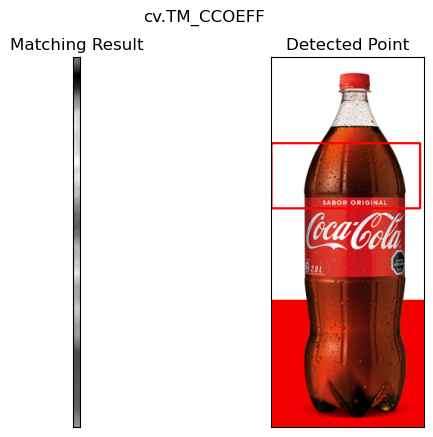

-0.15230439603328705 0.3090895712375641 (6, 20) (5, 412)
(5, 412)


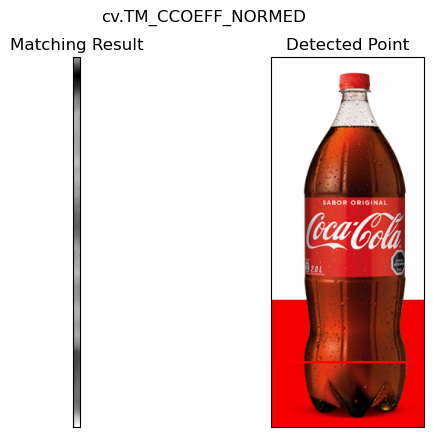

231818976.0 960961536.0 (7, 399) (0, 0)
(0, 0)


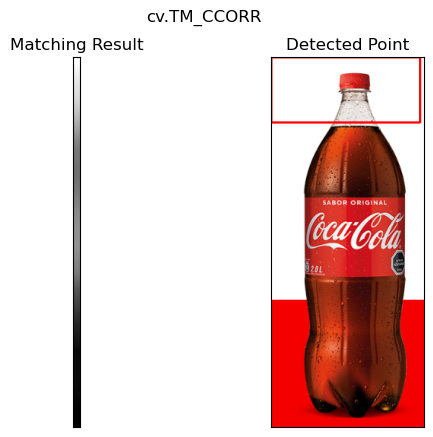

0.7905189394950867 0.9701461791992188 (7, 295) (0, 0)
(0, 0)


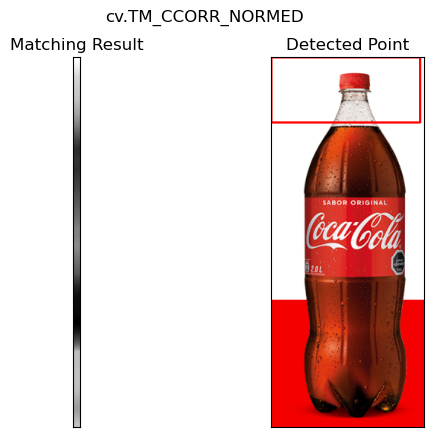

62838784.0 538594304.0 (0, 0) (7, 398)
(7, 398)


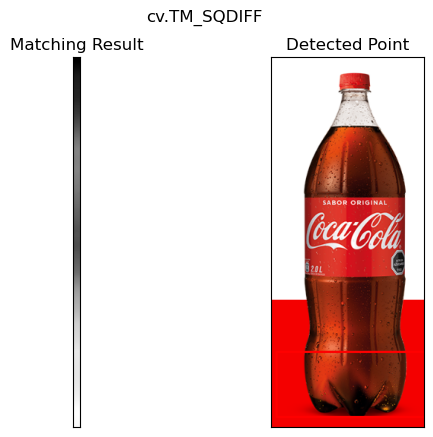

0.06343939900398254 1.0 (0, 0) (0, 295)
(0, 295)


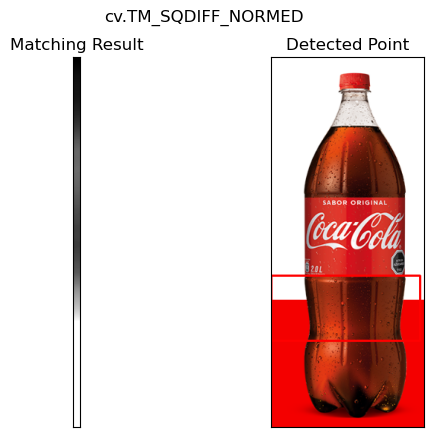

In [35]:
w, h = img_pattern_down.shape[::-1]
print("[INFO] performing template matching...")

methods = ["cv.TM_CCOEFF" , "cv.TM_CCOEFF_NORMED", "cv.TM_CCORR" , "cv.TM_CCORR_NORMED" , "cv.TM_SQDIFF" , "cv.TM_SQDIFF_NORMED"]

for m in methods:

    img1 = img_coca_logo_1.copy()
    method = eval(m)
    #Aplicamos la coincidencia de patrones
    img1_match = cv.matchTemplate(img_coca_logo_1_gray, img_pattern_down, method)
    minVal, maxVal, minLoc, maxLoc = cv.minMaxLoc(img1_match)
    
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = minLoc
    else:
        top_left = maxLoc
    
    print(minVal, maxVal, minLoc, maxLoc)

    #Indicamos el lugar donde se produjo la coincidencia
    top_left = maxLoc
    bottom_rigth = (top_left[0] + w, (top_left[1] + h))
    print(top_left)

    cv.rectangle(img1, top_left, bottom_rigth, 255, 2)

    # Plot results obtained
    plt.subplot(121),plt.imshow(img1_match,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    
    # Original image with bounding box
    plt.subplot(122),plt.imshow(img1)
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    
    plt.suptitle(m)
    plt.show()


### Coca logo 2

(363, 233)


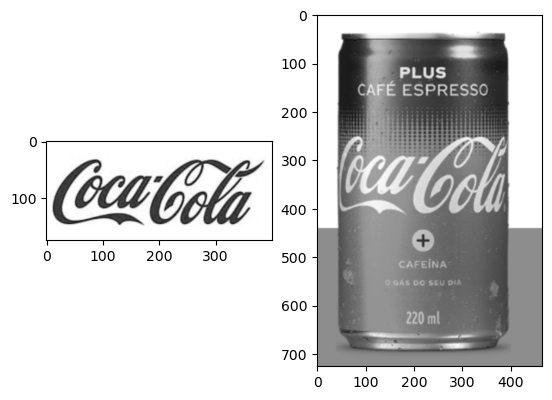

In [30]:
#Images to process
img_2 = cv.imread('./imgs/tp3/images/coca_logo_2.png', 0)
print(img_2.shape)
img2 = cv.pyrUp(img_2)

img_coca_logo_2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
img_coca_logo_2_gray = cv.cvtColor(img_coca_logo_2, cv.COLOR_RGB2GRAY)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(img_pattern, cmap= 'gray')
plt.subplot(1,2,2)
plt.imshow(img_coca_logo_2)

[INFO] performing template matching...


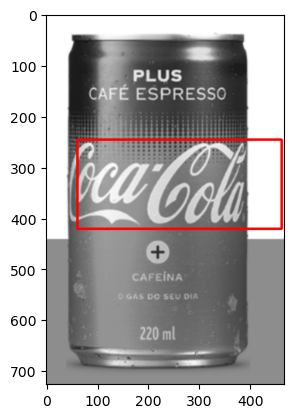

In [31]:
w, h = img_pattern.shape[::-1]
print("[INFO] performing template matching...")

method = 'cv.TM_SQDIFF_NORMED'

#Aplicamos la coincidencia de patrones
img_match_2 = cv.matchTemplate(img_coca_logo_2_gray, img_pattern, eval(method))
(minVal, maxVl, minLoc, maxLoc) = cv.minMaxLoc(img_match_2)

#Indicamos el lugar donde se produjo la coincidencia
top_left = minLoc
bottom_rigth = (top_left[0] + w, (top_left[1]+ h))

cv.rectangle(img_coca_logo_2, top_left, bottom_rigth, (255, 0, 0), 3)

#Graficamos el procesamiento y la salida 
plt.imshow(img_coca_logo_2)

### Retro 1

In [ ]:
#Images to process
img_3 = cv.imread('./imgs/tp3/images/coca_retro_1.png', 0)
print(img_3.shape)

img_coca_retro_1 = cv.cvtColor(img_3, cv.COLOR_BGR2RGB)
img_coca_retro_1_gray = cv.cvtColor(img_coca_retro_1, cv.COLOR_RGB2GRAY)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(img_pattern, cmap= 'gray')
plt.subplot(1,2,2)
plt.imshow(img_coca_retro_1)

In [ ]:
w, h = img_pattern.shape[::-1]
print("[INFO] performing template matching...")

methods = ["cv.TM_CCOEFF" , "cv.TM_CCOEFF_NORMED", "cv.TM_CCORR" , "cv.TM_CCORR_NORMED" , "cv.TM_SQDIFF" , "cv.TM_SQDIFF_NORMED"]

#Aplicamos la coincidencia de patrones
for m in methods:
    img3 = img_coca_retro_1.copy()
    method = eval(m)
    img3_match = cv.matchTemplate(img_coca_retro_1_gray, img_pattern,method)
    (minVal, maxVl, minLoc, maxLoc) = cv.minMaxLoc(img3_match)

    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = minLoc
    else:
        top_left = maxLoc
    
    #Indicamos el lugar donde se produjo la coincidencia
    top_left = maxLoc
    print(maxLoc)
    bottom_rigth = (top_left[0] + w, (top_left[1]+ h))
    print(bottom_rigth)

    cv.rectangle(img3, top_left, bottom_rigth, (255, 0, 0), 2)

    # Results of matching
    plt.subplot(121),plt.imshow(img3_match,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    
    # Original image with bounding box
    plt.subplot(122),plt.imshow(img3)
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    
    plt.suptitle(m)
    plt.show()

### Retro 2

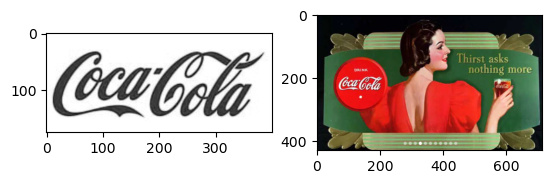

In [46]:
#Images to process
img_4 = cv.imread('./imgs/tp3/images/coca_retro_2.png')

img_coca_retro_2 = cv.cvtColor(img_4, cv.COLOR_BGR2RGB)
img_coca_retro_2_gray = cv.cvtColor(img_coca_retro_2, cv.COLOR_RGB2GRAY)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(img_pattern, cmap= 'gray')
plt.subplot(1,2,2)
plt.imshow(img_coca_retro_2)

400 175
[INFO] performing template matching...
(181, 232)
(581, 407)


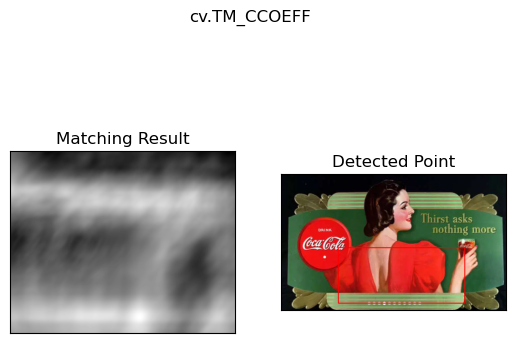

(181, 231)
(581, 406)


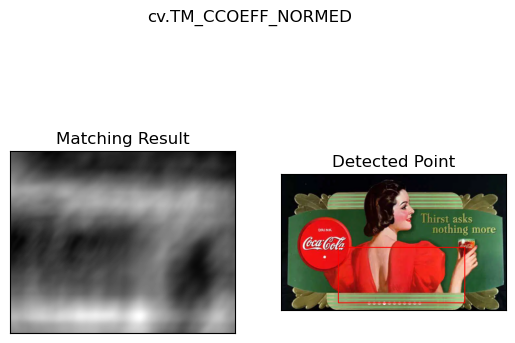

(189, 253)
(589, 428)


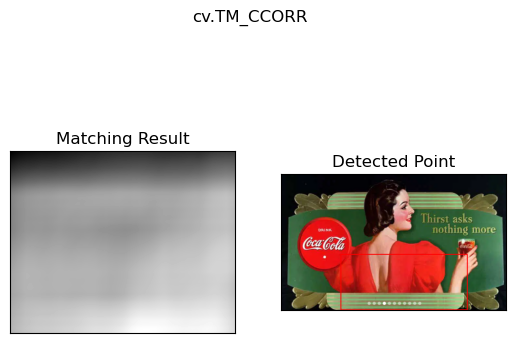

(118, 230)
(518, 405)


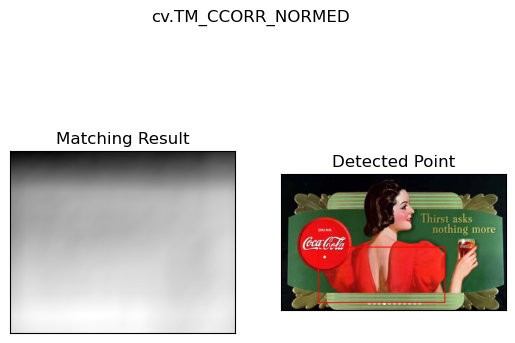

(0, 2)
(400, 177)


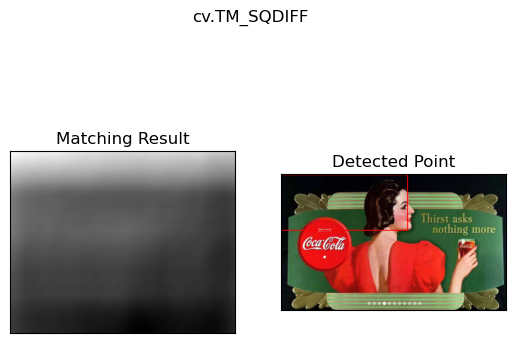

(0, 0)
(400, 175)


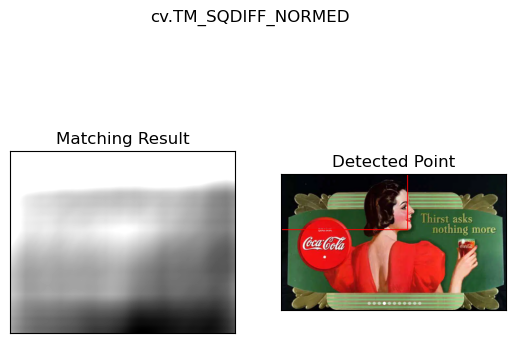

In [47]:
w, h = img_pattern.shape[::-1]
print(w, h)
print("[INFO] performing template matching...")

methods = ["cv.TM_CCOEFF" , "cv.TM_CCOEFF_NORMED", "cv.TM_CCORR" , "cv.TM_CCORR_NORMED" , "cv.TM_SQDIFF" , "cv.TM_SQDIFF_NORMED"]

for m in methods:
    img4 = img_coca_retro_2.copy()

    method = eval(m)

    #Aplicamos la coincidencia de patrones
    img4_match = cv.matchTemplate(img_coca_retro_2_gray, img_pattern, method)
    (minVal, maxVl, minLoc, maxLoc) = cv.minMaxLoc(img4_match)

    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = minLoc
    else:
        top_left = maxLoc

    #Indicamos el lugar donde se produjo la coincidencia
    top_left = maxLoc
    print(maxLoc)
    bottom_rigth = (top_left[0] + w, top_left[1] + h )
    print(bottom_rigth)
    
    cv.rectangle(img4, top_left, bottom_rigth, (255, 0, 0), 2)

    # Plot results obtained
    plt.subplot(121),plt.imshow(img4_match,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    
    # Original image with bounding box
    plt.subplot(122),plt.imshow(img4)
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    
    plt.suptitle(m)
    plt.show()

### Coca cola logo

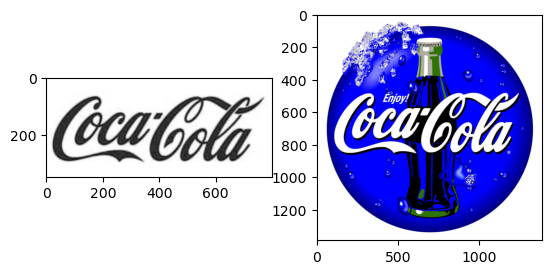

In [56]:
#Images to process
img5_pattern = cv.pyrUp(img_pattern)
img_5 = cv.imread('./imgs/tp3/images/COCA-COLA-LOGO.jpg')

img_coca_cola_logo = cv.cvtColor(img_5, cv.COLOR_BGR2RGB)
img_coca_cola_logo_gray = cv.cvtColor(img_coca_cola_logo, cv.COLOR_RGB2GRAY)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(img5_pattern, cmap= 'gray')
plt.subplot(1,2,2)
plt.imshow(img_5)

800 350
[INFO] performing template matching...
(55, 288)
(855, 638)


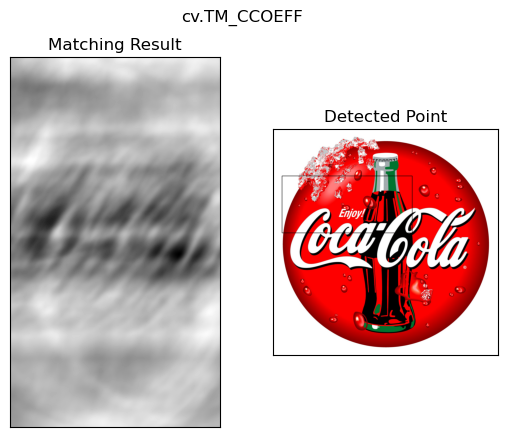

(68, 287)
(868, 637)


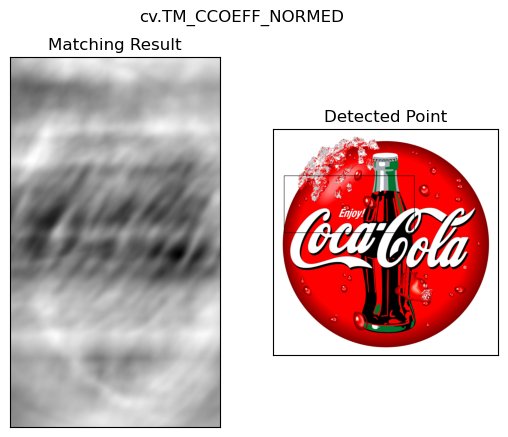

(0, 0)
(800, 350)


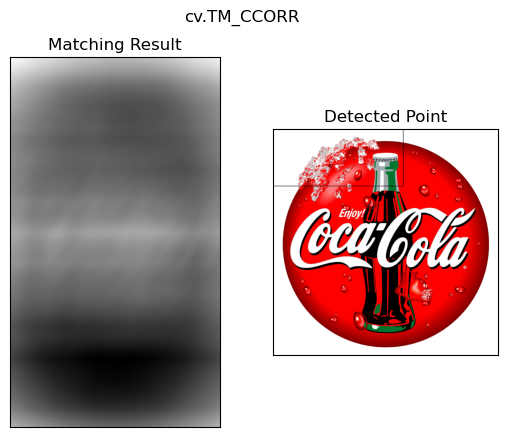

(0, 0)
(800, 350)


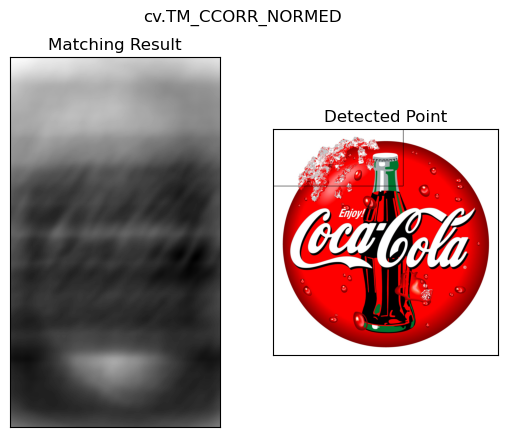

(333, 849)
(1133, 1199)


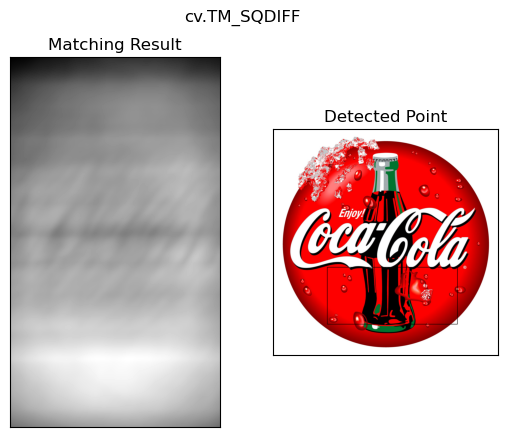

(153, 730)
(953, 1080)


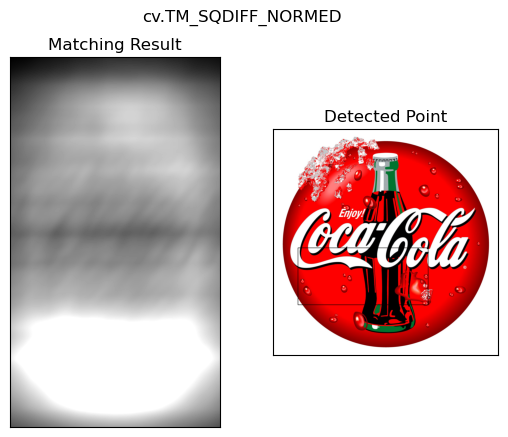

In [57]:
w, h = img5_pattern.shape[::-1]
print(w, h)
print("[INFO] performing template matching...")

methods = ["cv.TM_CCOEFF" , "cv.TM_CCOEFF_NORMED", "cv.TM_CCORR" , "cv.TM_CCORR_NORMED" , "cv.TM_SQDIFF" , "cv.TM_SQDIFF_NORMED"]

for m in methods:
    img5 = img_coca_cola_logo.copy()

    method = eval(m)

    #Aplicamos la coincidencia de patrones
    img5_match = cv.matchTemplate(img_coca_cola_logo_gray, img5_pattern, method)
    (minVal, maxVl, minLoc, maxLoc) = cv.minMaxLoc(img5_match)

    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = minLoc
    else:
        top_left = maxLoc

    #Indicamos el lugar donde se produjo la coincidencia
    top_left = maxLoc
    print(maxLoc)
    bottom_rigth = (top_left[0] + w, top_left[1] + h )
    print(bottom_rigth)
    
    cv.rectangle(img5, top_left, bottom_rigth, (1.0, 0, 0), 2)

    # Plot results obtained
    plt.subplot(121),plt.imshow(img5_match,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    
    # Original image with bounding box
    plt.subplot(122),plt.imshow(img5)
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    
    plt.suptitle(m)
    plt.show()

### Ejercicio 2

In [ ]:
img = cv.imread('./imgs/tp2/lenaImage.png', cv.IMREAD_GRAYSCALE)

### Ejercicio 3